# 01.Busqueda de APIS

## API-FOOTBALL

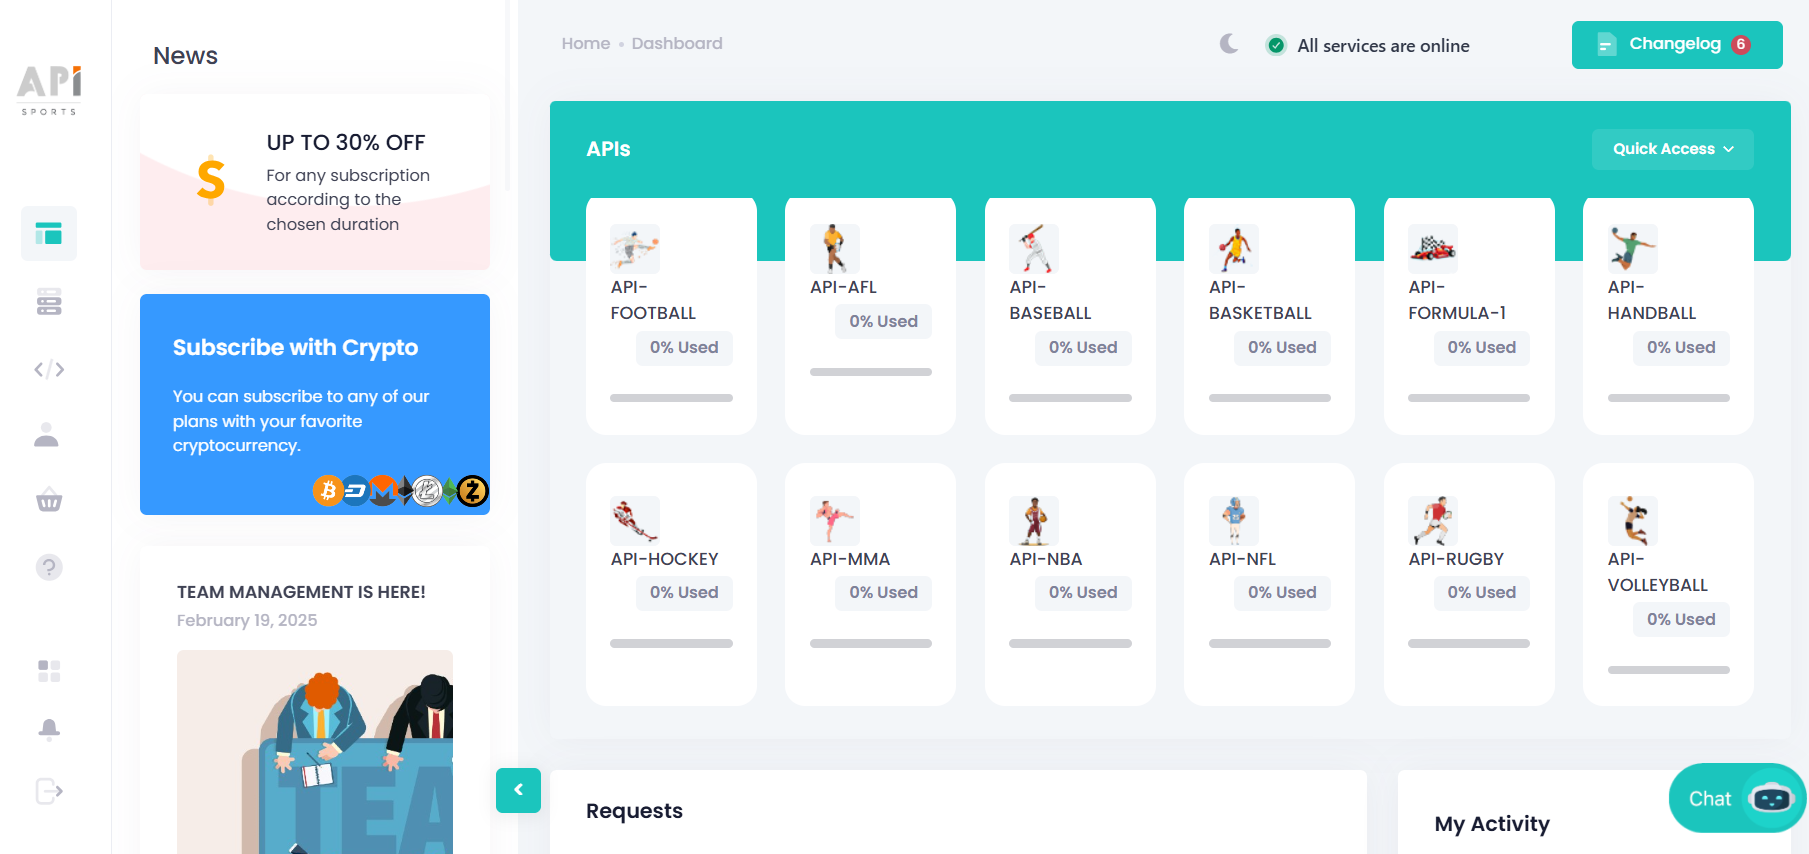

[URL API](https://dashboard.api-football.com)

In [1]:
pip install requests


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\futbo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
import requests

url = "https://v3.football.api-sports.io/teams"
querystring = {"search": "Millonarios"}

headers = {
    'x-rapidapi-key': '1731a1ee2a9f61dd7b59ae82b186fd60',
    'x-rapidapi-host': 'v3.football.api-sports.io'
}

response = requests.get(url, headers=headers, params=querystring)
data = response.json()

# Accede al primer resultado de búsqueda
team_info = data['response'][0]['team']
venue_info = data['response'][0]['venue']

print(f"🔵 Nombre: {team_info['name']}")
print(f"🆔 ID del equipo: {team_info['id']}")
print(f"🌎 País: {team_info['country']}")
print(f"📅 Fundación: {team_info['founded']}")
print(f"🏟 Estadio: {venue_info['name']}")
print(f"📍 Ciudad: {venue_info['city']}")
print(f"👥 Capacidad: {venue_info['capacity']}")
print(f"🖼 Logo: {team_info['logo']}")


🔵 Nombre: Millonarios
🆔 ID del equipo: 1125
🌎 País: Colombia
📅 Fundación: 1946
🏟 Estadio: Estadio Nemesio Camacho El Campín
📍 Ciudad: Bogotá, D.C.
👥 Capacidad: 39512
🖼 Logo: https://media.api-sports.io/football/teams/1125.png


In [15]:
import http.client
import json
import pandas as pd

# Conexión y headers
conn = http.client.HTTPSConnection("v3.football.api-sports.io")
headers = {
    'x-rapidapi-host': "v3.football.api-sports.io",
    'x-rapidapi-key': "1731a1ee2a9f61dd7b59ae82b186fd60"
}

conn.request("GET", "/teams/statistics?season=2019&team=33&league=39", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))
# Convertir a diccionario
data_dict = json.loads(data.decode("utf-8"))

# Extraer la parte relevante y convertirla en DataFrame
seasons = data_dict.get("response", [])
df_seasons = pd.DataFrame(seasons)

# Mostrar
print(df_seasons)


{"get":"teams\/statistics","parameters":{"season":"2019","team":"33","league":"39"},"errors":{"plan":"Free plans do not have access to this season, try from 2021 to 2023."},"results":0,"paging":{"current":1,"total":1},"response":[]}
Empty DataFrame
Columns: []
Index: []


In [19]:
data

{'get': 'fixtures',
 'parameters': {'team': '2956', 'last': '5'},
 'errors': {'plan': 'Free plans do not have access to the Last parameter.'},
 'results': 0,
 'paging': {'current': 1, 'total': 1},
 'response': []}

Los planes gratituitos no aceptan aceso a los ultimos partidos entonces la api no sirve.

## Global Sports Archive

In [2]:
import requests
from bs4 import BeautifulSoup

# URL de Millonarios en Global Sports Archive (Liga BetPlay)
url = "https://globalsportsarchive.com/team/soccer/millonarios-fc/1992/"

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Buscamos la tabla o sección donde están los últimos partidos
# En este sitio, los últimos partidos suelen estar en una tabla con clase "results" o similar

matches = soup.find_all("div", class_="match-info")[:5]  # tomamos solo los últimos 5 partidos

for match in matches:
    date = match.find("div", class_="date").text.strip()
    teams = match.find_all("span", class_="team-name")
    home_team = teams[0].text.strip()
    away_team = teams[1].text.strip()
    score = match.find("span", class_="score").text.strip()
    
    print(f"{date}: {home_team} {score} {away_team}")


In [3]:
matches

[]

## Espn API

In [4]:
pip install espn_api

   ---------------------------------------- 0.0/67.6 kB ? eta -:--:--
   ------------------ --------------------- 30.7/67.6 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 67.6/67.6 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/126.3 kB ? eta -:--:--
   ---------------------------------------- 126.3/126.3 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.3.0
    Uninstalling urllib3-2.3.0:
      Successfully uninstalled urllib3-2.3.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\futbo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import requests

# Ejemplo: Resultados recientes del Real Madrid (cambia el team ID según el equipo)
team_id = 85  # ID de Real Madrid en ESPN
url = f"https://site.api.espn.com/apis/site/v2/sports/soccer/esp.1/teams/{team_id}"

response = requests.get(url)
data = response.json()

# Mostrar últimos partidos (eventos)
events = data.get("team", {}).get("record", {}).get("items", [])
print("Últimos resultados del equipo:")
for e in events:
    summary = e.get("summary")
    description = e.get("description")
    print(f"{description}: {summary}")


Últimos resultados del equipo:
Overall Record: 15-7-15


## The sportsDB

In [17]:
pip install --upgrade requests urllib3


  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
   ---------------------------------------- 0.0/128.7 kB ? eta -:--:--
   --------- ------------------------------ 30.7/128.7 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 128.7/128.7 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: requests
    Found existing installation: requests 2.7.0
    Uninstalling requests-2.7.0:
      Successfully uninstalled requests-2.7.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
espn-api 0.45.0 requires urllib3<=2.2.3, but you have urllib3 2.4.0 which is incompatible.
soccer-cli 0.1.0.0 requires requests==2.7.0, but you have requests 2.32.3 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\futbo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Ultimos partidos

In [39]:
import http.client
import json

# Paso 1: Buscar el ID del equipo
def buscar_equipo(nombre):
    conn = http.client.HTTPSConnection("www.thesportsdb.com")
    conn.request("GET", f"/api/v1/json/3/searchteams.php?t={nombre}")
    res = conn.getresponse()
    data = json.loads(res.read().decode("utf-8"))
    if data["teams"]:
        equipo = data["teams"][0]
        return equipo["idTeam"], equipo["strTeam"]
    else:
        return None, None

# Paso 2: Obtener los últimos partidos
def resultados_recientes(id_team):
    conn = http.client.HTTPSConnection("www.thesportsdb.com")
    conn.request("GET", f"/api/v1/json/3/eventslast.php?id={id_team}")
    res = conn.getresponse()
    data = json.loads(res.read().decode("utf-8"))
    return data["results"]

# Ejecutar para Millonarios
id_equipo, nombre = buscar_equipo("Millonarios")
if id_equipo:
    partidos = resultados_recientes(id_equipo)
    print(f"Últimos partidos de {nombre}:\n")
    for p in partidos:
        print(f"{p['dateEvent']} - {p['strEvent']} - {p['intHomeScore']} : {p['intAwayScore']}")
else:
    print("Equipo no encontrado.")


Últimos partidos de Millonarios:

2025-05-17 - Millonarios vs Envigado - 1 : 0
2025-05-09 - Millonarios vs Deportivo Pereira - 0 : 0
2025-04-13 - Millonarios vs Atlético Nacional - 0 : 0
2025-03-30 - Millonarios vs Alianza de Valledupar - 2 : 0
2025-03-27 - Millonarios vs Independiente Santa Fe - 2 : 0


In [40]:
import http.client
import json

# Paso 1: Buscar el ID del equipo
def buscar_equipo(nombre):
    conn = http.client.HTTPSConnection("www.thesportsdb.com")
    conn.request("GET", f"/api/v1/json/3/searchteams.php?t={nombre}")
    res = conn.getresponse()
    data = json.loads(res.read().decode("utf-8"))
    if data["teams"]:
        equipo = data["teams"][0]
        return equipo["idTeam"], equipo["strTeam"]
    else:
        return None, None

# Paso 2: Obtener los últimos partidos
def resultados_recientes(id_team):
    conn = http.client.HTTPSConnection("www.thesportsdb.com")
    conn.request("GET", f"/api/v1/json/3/eventslast.php?id={id_team}")
    res = conn.getresponse()
    data = json.loads(res.read().decode("utf-8"))
    return data["results"]

# Paso 3: Filtrar partidos de la temporada actual
def filtrar_por_temporada(partidos):
    # Detectamos la temporada más común en los partidos obtenidos
    temporadas = [p.get("strSeason") for p in partidos if p.get("strSeason")]
    if not temporadas:
        return partidos  # Si no hay temporada, retornamos todos
    temporada_actual = max(set(temporadas), key=temporadas.count)  # temporada que más se repite
    return [p for p in partidos if p.get("strSeason") == temporada_actual]

# Ejecutar para Millonarios
id_equipo, nombre = buscar_equipo("Millonarios")
if id_equipo:
    partidos = resultados_recientes(id_equipo)
    partidos_temporada = filtrar_por_temporada(partidos)
    
    print(f"Últimos partidos de {nombre} en temporada {partidos_temporada[0].get('strSeason', 'desconocida')}:\n")
    for p in partidos_temporada:
        print(f"{p['dateEvent']} - {p['strEvent']} - {p['intHomeScore']} : {p['intAwayScore']}")
else:
    print("Equipo no encontrado.")


Últimos partidos de Millonarios en temporada 2025:

2025-05-17 - Millonarios vs Envigado - 1 : 0
2025-05-09 - Millonarios vs Deportivo Pereira - 0 : 0
2025-04-13 - Millonarios vs Atlético Nacional - 0 : 0
2025-03-30 - Millonarios vs Alianza de Valledupar - 2 : 0
2025-03-27 - Millonarios vs Independiente Santa Fe - 2 : 0


In [69]:
def buscar_ligas(country):
    conn = http.client.HTTPSConnection("www.thesportsdb.com")
    conn.request("GET", f"/api/v1/json/3/search_all_leagues.php?s=Soccer&c={country}")
    res = conn.getresponse()
    data = json.loads(res.read().decode("utf-8"))
    
    # Extraemos solo los idLeague en una lista
    id_leagues = [(liga["idLeague"],liga["strLeague"]) for liga in data.get("countries", [])]
    
    return id_leagues

# Ejemplo de uso
ids_colombia = buscar_ligas("Colombia")
print(ids_colombia)


[('4497', 'Colombia Categoría Primera A'), ('4951', 'Colombian Categoría Primera B'), ('5183', 'Copa Colombia')]


### Listar equipos de la Liga

In [71]:
import http.client
import json
import urllib.parse

def listar_equipos(liga):
    conn = http.client.HTTPSConnection("www.thesportsdb.com")
    liga_encoded = urllib.parse.quote(liga)  # Codifica caracteres especiales
    conn.request("GET", f"/api/v1/json/3/search_all_teams.php?l={liga_encoded}")
    res = conn.getresponse()
    data = json.loads(res.read().decode("utf-8"))
    print(json.dumps(data, indent=2))  # Imprime estructurado para que puedas ver mejor
    return data

# Llamada
listar_equipos("Colombia Categoría Primera A")


{
  "teams": [
    {
      "idTeam": "137605",
      "idESPN": "0",
      "idAPIfootball": "1141",
      "intLoved": null,
      "strTeam": "Alianza de Valledupar",
      "strTeamAlternate": "Alianza Petrolera F.C.",
      "strTeamShort": "",
      "intFormedYear": "1991",
      "strSport": "Soccer",
      "strLeague": "Colombia Categor\u00eda Primera A",
      "idLeague": "4497",
      "strLeague2": "Copa Colombia",
      "idLeague2": "5183",
      "strLeague3": "",
      "idLeague3": null,
      "strLeague4": "",
      "idLeague4": null,
      "strLeague5": "",
      "idLeague5": null,
      "strLeague6": "",
      "idLeague6": null,
      "strLeague7": "",
      "idLeague7": null,
      "strDivision": null,
      "idVenue": "20928",
      "strStadium": "Estadio Armando Maestre Pavajeau",
      "strKeywords": "",
      "strRSS": "",
      "strLocation": "Valledupar, Colombia",
      "intStadiumCapacity": "11000",
      "strWebsite": "www.alianzapetrolerafc.com/welcome.html",
      "s

{'teams': [{'idTeam': '137605',
   'idESPN': '0',
   'idAPIfootball': '1141',
   'intLoved': None,
   'strTeam': 'Alianza de Valledupar',
   'strTeamAlternate': 'Alianza Petrolera F.C.',
   'strTeamShort': '',
   'intFormedYear': '1991',
   'strSport': 'Soccer',
   'strLeague': 'Colombia Categoría Primera A',
   'idLeague': '4497',
   'strLeague2': 'Copa Colombia',
   'idLeague2': '5183',
   'strLeague3': '',
   'idLeague3': None,
   'strLeague4': '',
   'idLeague4': None,
   'strLeague5': '',
   'idLeague5': None,
   'strLeague6': '',
   'idLeague6': None,
   'strLeague7': '',
   'idLeague7': None,
   'strDivision': None,
   'idVenue': '20928',
   'strStadium': 'Estadio Armando Maestre Pavajeau',
   'strKeywords': '',
   'strRSS': '',
   'strLocation': 'Valledupar, Colombia',
   'intStadiumCapacity': '11000',
   'strWebsite': 'www.alianzapetrolerafc.com/welcome.html',
   'strFacebook': 'www.facebook.com/APetroleraCF',
   'strTwitter': 'twitter.com/apetrolera',
   'strInstagram': 'www.

Utilizaremos esta API para gestionar nuestro proyecto